<a href="https://colab.research.google.com/github/maincarey/ML/blob/master/logisticregressionmulticlass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

In [0]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [0]:
# this data set is number images - the pixel value is 8 by 8 but the array is one dimentional
# the . data below is shown above 'data'
# The image is 8 by 8 which is 64 and below you see there are 64 numbers representting the array
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

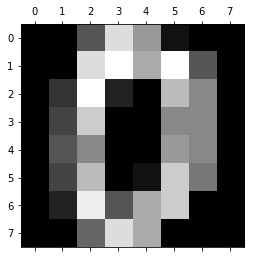

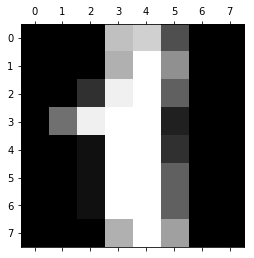

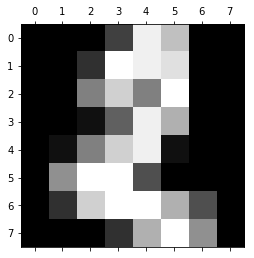

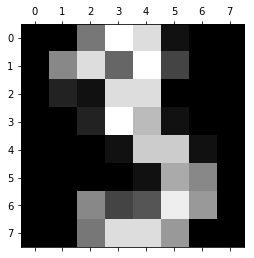

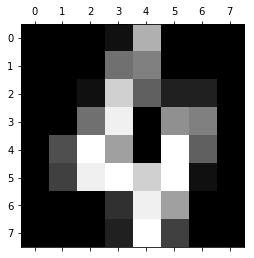

In [0]:
# mathshow prints the image - in range is first 5 samples
plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i])

In [0]:
# this is the target value from above which gives us the id of the image in the dataset in the array below
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# so we are passing digits.data as the X because it contains the pixel value for each image and 
# we are passing target for y because it identifies which image
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

In [0]:
len(X_train)

1437

In [0]:
len(X_test)

360

In [0]:
# x train has the image and y train has the array value
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
model.score(X_test,y_test)

0.9416666666666667

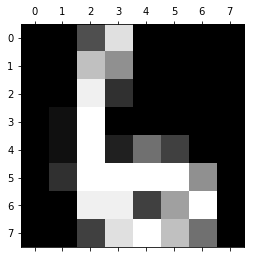

In [0]:
plt.matshow(digits.images[67])

In [0]:
digits.target[67]

6

In [0]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [0]:
# get all predicted values
y_predicted = model.predict(X_test)


In [0]:
# 2 by 2 dimentional array confusion matrix show how well model it spot on then shows you where the incorrects were
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[32,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 26,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  0,  1, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  1,  0, 34,  1],
       [ 0,  1,  0,  1,  0,  1,  0,  2,  2, 26]])

Text(69.0, 0.5, 'Truth')

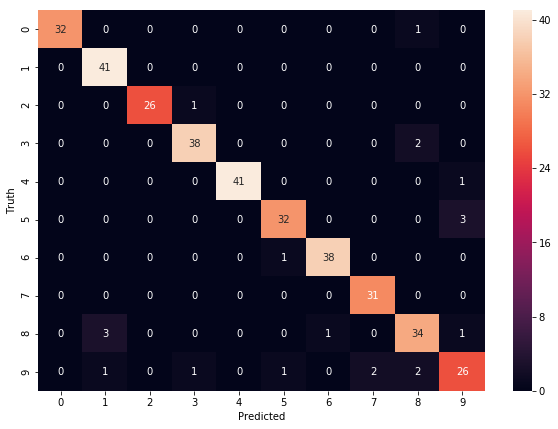

In [0]:
# seaborn simlilar to matlib 
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')